<a href="https://colab.research.google.com/github/Aaditya97735/Aaditya97735/blob/main/superstore_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Sample - Superstore.csv to Sample - Superstore.csv
First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Pos

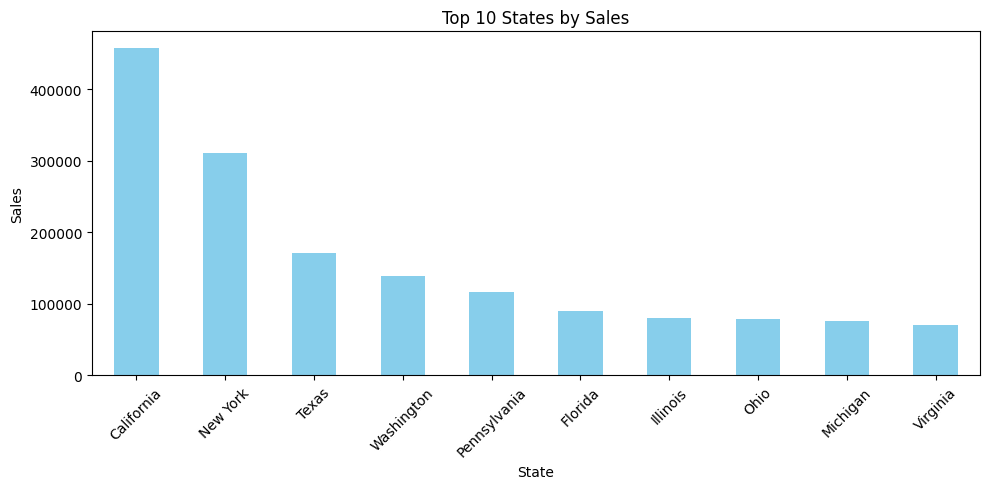

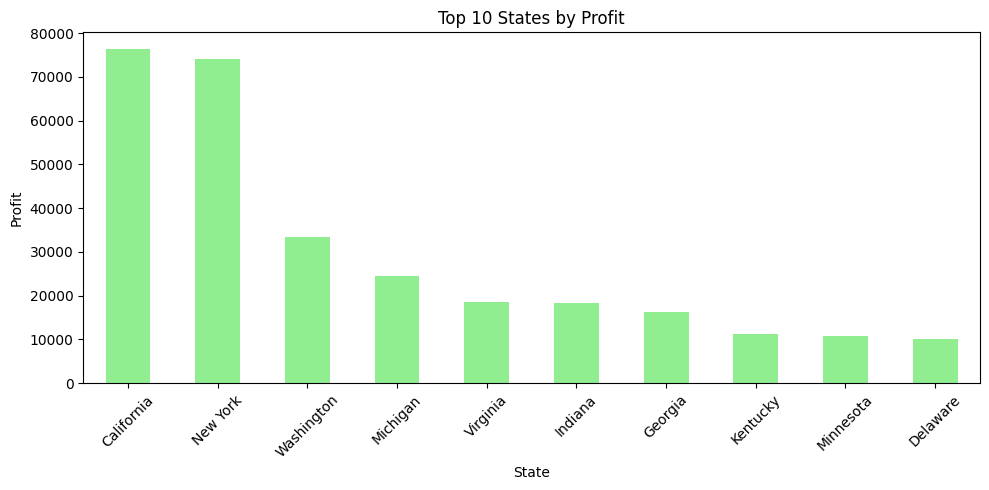

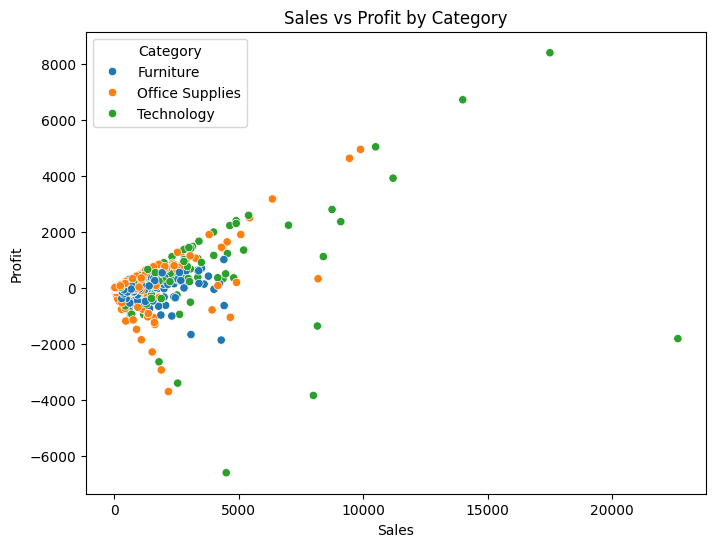

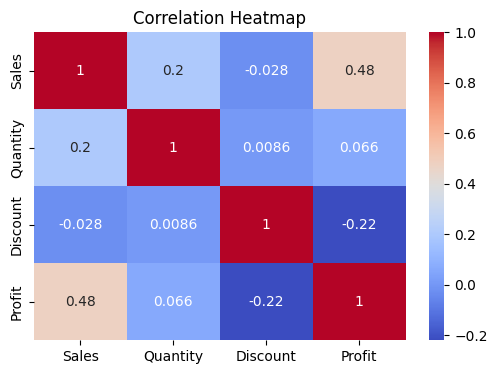

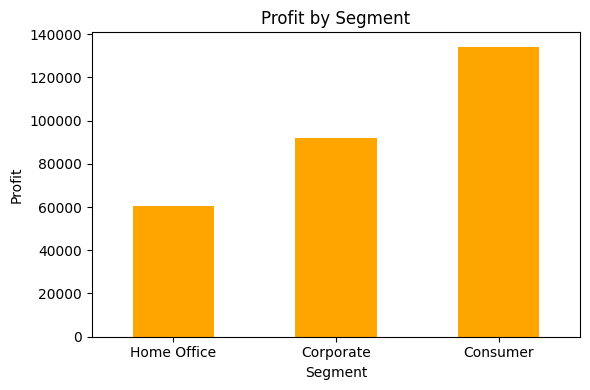

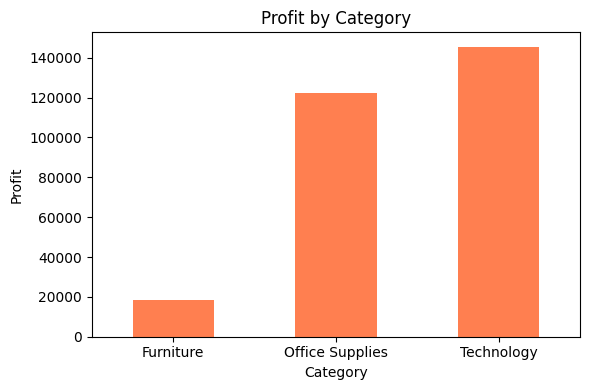

In [ ]:
# Upload the dataset in Colab
from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Top 10 states by total sales
top_states_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_states_sales.plot(kind='bar', color='skyblue')
plt.title("Top 10 States by Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 states by total profit
top_states_profit = df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_states_profit.plot(kind='bar', color='lightgreen')
plt.title("Top 10 States by Profit")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales vs Profit Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Sales", y="Profit", data=df, hue="Category")
plt.title("Sales vs Profit by Category")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[["Sales", "Quantity", "Discount", "Profit"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Segment-wise profit
segment_profit = df.groupby("Segment")["Profit"].sum().sort_values()
plt.figure(figsize=(6,4))
segment_profit.plot(kind='bar', color='orange')
plt.title("Profit by Segment")
plt.ylabel("Profit")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Category-wise profit
category_profit = df.groupby("Category")["Profit"].sum()
plt.figure(figsize=(6,4))
category_profit.plot(kind='bar', color='coral')
plt.title("Profit by Category")
plt.ylabel("Profit")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-2-8ecf3e841031>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.set_index('Order Date').resample('M')[['Sales', 'Profit']].sum()


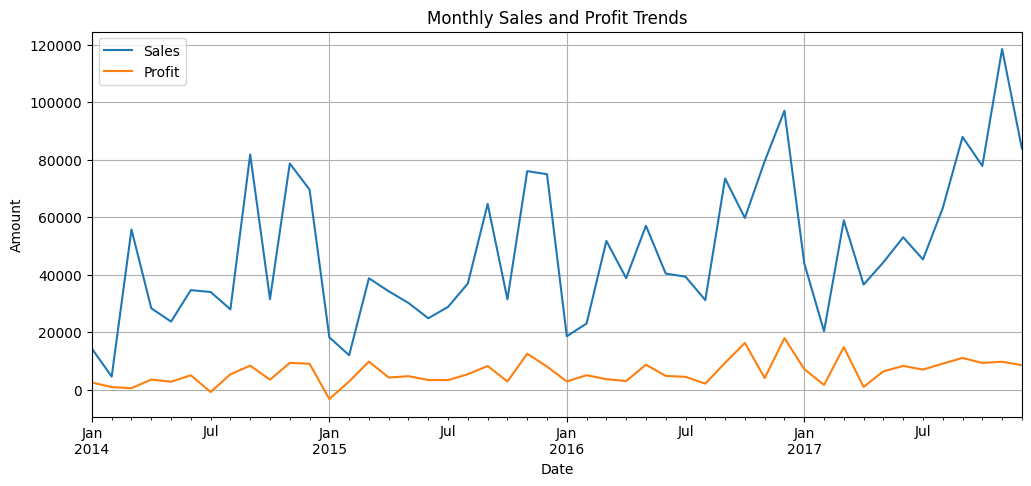

In [ ]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Monthly Sales and Profit Trends
monthly_data = df.set_index('Order Date').resample('M')[['Sales', 'Profit']].sum()

# Plot
import matplotlib.pyplot as plt

monthly_data.plot(figsize=(12, 5), title="Monthly Sales and Profit Trends")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.grid(True)
plt.show()


In [ ]:
# Recency, Frequency, Monetary Value
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Sales': 'MonetaryValue'})

print(rfm.head())


             Recency  Frequency  MonetaryValue
Customer ID                                   
AA-10315         185          5       5563.560
AA-10375          20          9       1056.390
AA-10480         260          4       1790.512
AA-10645          56          6       5086.935
AB-10015         416          3        886.156


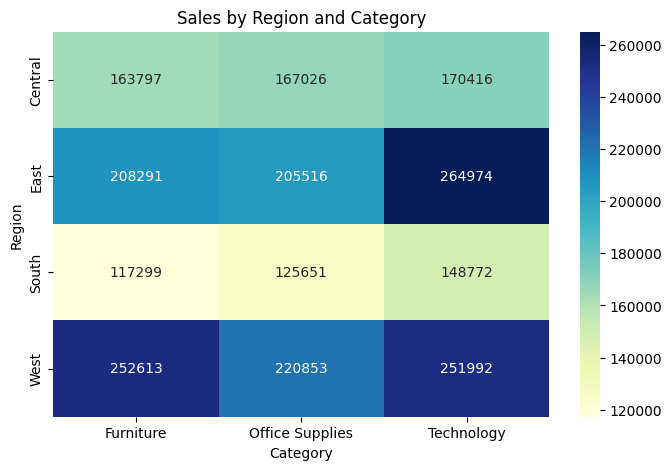

In [ ]:
import seaborn as sns

region_data = df.groupby(['Region', 'Category'])['Sales'].sum().unstack()
plt.figure(figsize=(8, 5))
sns.heatmap(region_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by Region and Category")
plt.show()


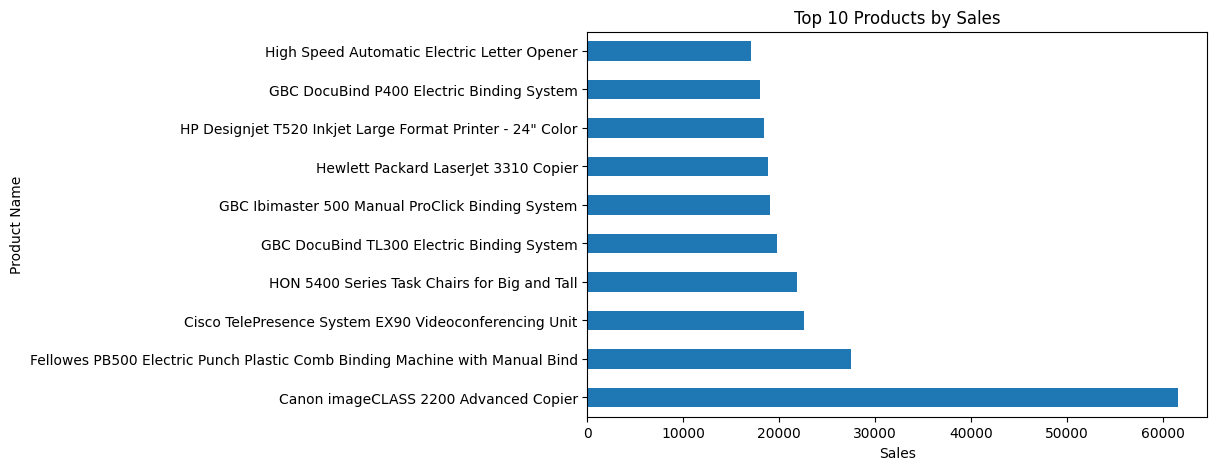

Loss-making Products with High Sales:
                                                         Sales     Profit
Product Name                                                            
Cubify CubeX 3D Printer Double Head Print           11099.963 -8879.9704
Lexmark MX611dhe Monochrome Laser Printer           16829.901 -4589.9730
Cubify CubeX 3D Printer Triple Head Print            7999.980 -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Table...   9917.640 -2876.1156
Bush Advantage Collection Racetrack Conference ...   9544.725 -1934.3976
GBC DocuBind P400 Electric Binding System           17965.068 -1878.1662
Cisco TelePresence System EX90 Videoconferencin...  22638.480 -1811.0784
Martin Yale Chadless Opener Electric Letter Opener  16656.200 -1299.1836
Balt Solid Wood Round Tables                         6518.754 -1201.0581
BoxOffice By Design Rectangular and Half-Moon M...   1706.250 -1148.4375


In [ ]:
# Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Sales', figsize=(8,5))
plt.xlabel("Sales")
plt.show()

# Products with high sales but negative profit
loss_products = df.groupby('Product Name')[['Sales', 'Profit']].sum()
loss_products = loss_products[(loss_products['Sales'] > 1000) & (loss_products['Profit'] < 0)]
print("Loss-making Products with High Sales:\n", loss_products.sort_values('Profit').head(10))


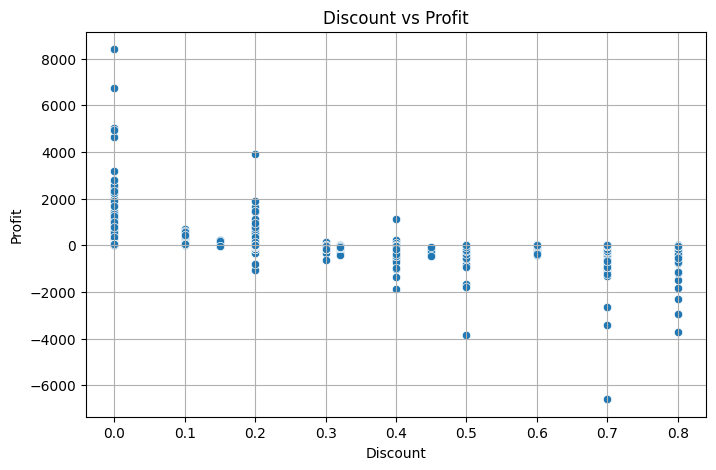

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.grid(True)
plt.show()


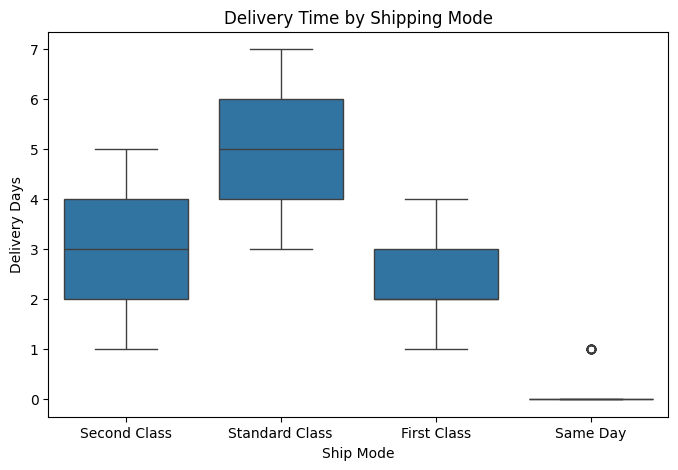

In [ ]:
# Convert Ship Date to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8, 5))
sns.boxplot(x='Ship Mode', y='Delivery Days', data=df)
plt.title("Delivery Time by Shipping Mode")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Create a binary target: 1 if profit > 0 else 0
df['Profitable'] = (df['Profit'] > 0).astype(int)

# Encode categorical columns
features = df[['Sales', 'Quantity', 'Discount', 'Segment', 'Category', 'Region']]
features = pd.get_dummies(features, drop_first=True)
target = df['Profitable']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80       377
           1       0.95      0.96      0.95      1622

    accuracy                           0.93      1999
   macro avg       0.89      0.86      0.87      1999
weighted avg       0.92      0.93      0.92      1999

